## single layer perceptron
in this notebook, we will implement a sigle layer perceptron model in object-oriented manner on Iris dataset, then we gonna train it and visualize the errors of each epoch of training process and lastly there is a visualizaion to show the decision boundries of a trianed single neuron (source of codes is python machine learning book).

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd 

### defining **Perceptron** class to provide object-orientd model of perceptron 

In [30]:

class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                #print(f"self.w_ : {self.w_} update : {update}, xi : {xi}, target : {target}, self.predict : {self.predict(xi)}") # for monitoring purposes
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### use pandas to load Iris dataset 

In [1]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 
                 'iris','iris.data')
print("URL",s)

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [32]:
df = pd.read_csv(s,
                header=None,
                encoding='utf-8'
                )
df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
#select setosa and versicolor class of df

y = df.iloc[0:100,4]    # set the value first 100 rows and 4's column of df as 'y' vector
y = np.where(y == "Iris-setosa", -1, 1)     # set label value 1 for Iris-versicolor class and -1 for Iris-setosa class

X = df.iloc[0:100, [0,2]].values     # extract sepal length and petal length (first and third column) as 'X' vector

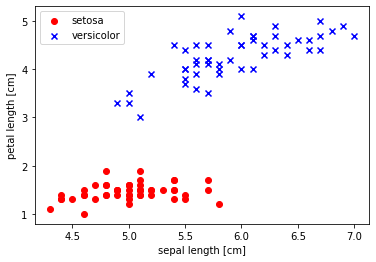

In [34]:
# plot data

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()                      # this scatterplot will show the ditribution of flower examples in the Iris dataset along the two feature axes : petal length and sepal length 

as we can see, *setosa* and *versicolor* classes are linearly seperable, therefore we can use `Perceptron` to classify this class 

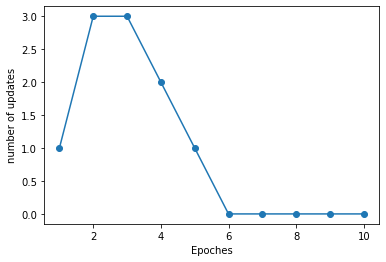

In [35]:
# now it's time to train our perceptron algorithm on the Iris data subset that we just extracted.

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

# also we want to plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that seperates two Iris flower classes

plt.plot(range(1, len(ppn.errors_)+1),
         ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('number of updates')
plt.show()

In [36]:
# creating a function to visualize the decision boundaries for this two-dimensional dataset

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipykernel_692339/593193164.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


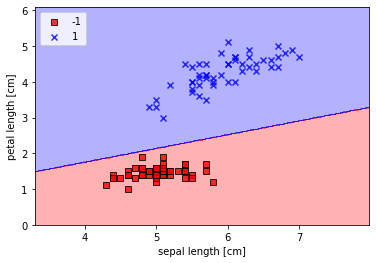

In [37]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()